# Análisis de mercado inmobiliario. Properati Argentina

## Problema

Ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### Desglose del problema


¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?


Los datos que me ayudarian para poder abordar el problema serian:

* Precios de las propiedades 
* Caracteristicas de la mismas (habitaciones , baños, garage, etc..)
* Localizacion geografica de la propiedad
* Antigüedad de la vivienda

Luego de realizar una busqueda sobre los factores que mas influyen para la tasa de una vivienda , se recopilaron las que resultaban como denominador comun y que más peso tenian al tomar el valor de una vivienda, es por eso que se seleccionaron estas variables. Las diferentes variables que tendremos en base a los analisis estadisticos y predictivos seran decisivos para poder tomar las mejores decisiones , como asi tambien armar un modelo que no sea sesgado.


In [1]:
#Importo las librerias que seran necesarias para la primera parte
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Grabo el archivo en una variable
df = pd.read_csv('Datos_RealEstate.csv')

In [4]:
# Primera vista de los datos
df.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Veremos las caracteristicas de los atributos que poseemos en el dataset, como asi tambien los tipos de datos que se encuentran.

Recordemos que los tipo *OBJECT* puede contener tipo mixtos (numeros y secuencia de caracteres) y los tipos *FLOAT* la cual contienen decimales.
Esto es importante por que la secuencia de caracteres no pueden realizar operaciones matematicas y dependiendo la variable
tendriamos que convertirla en caso de ser necesario


In [5]:
df.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

# Caracteristica de cada variable


- start_date:         Fecha en que inicia la publicacion de la propiedad.
- end_date:           Fecha en que finaliza la publicacion propiedad.
- created_on:         Fecha de alta de la primera versión del aviso.
- lat:                Coordenadas de ubicacion del inmueble (Latitud).
- lon:                Coordenadas de ubicacion del inmueble (Longuitud).
- l1:                 Pais donde se ubica la propiedad.
- l2:                 Distrito donde se ubica la propiedad.
- l3:                 Localidad/Barrio donde se ubico la propiedad.
- rooms:              Cantidad de Habitaciones.
- bedrooms:           Cantidad de Dormitorios.
- bathrooms:          Cantidad de Baños.
- surface_total:      Superficie total del inmueble.
- surface_covered:    Superficie construida.
- price:              Precio del inmueble.
- currency:           Moneda en el que es tasado el inmueble.
- title:              Titulo de la publicacion.
- description:        Descripcion de la publicacion.
- property_type:      Tipo de propiedad.
- operation_type:     Operacion disponible para la propiedad.

# Tamaño del DataSet 

- Filas : 146660
- Columnas : 19

In [6]:
df.shape

(146660, 19)

 **Valores Faltantes**

In [7]:
df.isnull().any()

start_date         False
end_date           False
created_on         False
lat                 True
lon                 True
l1                 False
l2                 False
l3                 False
rooms              False
bedrooms           False
bathrooms           True
surface_total       True
surface_covered     True
price              False
currency           False
title              False
description        False
property_type      False
operation_type     False
dtype: bool

Los valores faltantes los tenemos en las columnas de:
    - lat
    - lon
    - bathrooms
    - surface_total
    - surface_covered


Sumatoria de datos faltantes

In [8]:
df.isnull().sum().sum()

67982

Ahora veremos la cantidad de NaN que tenemos por cada columna

In [9]:
df.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Reviso si hay valores duplicados que podrian sesgar el dataset

In [10]:
duplicado_dsprincipal = df[df.duplicated()]
print("Numero de filas duplicadas: ",duplicado_dsprincipal.shape)


Numero de filas duplicadas:  (2358, 19)


Estos valores seran borrados en el los siguientes pasos para tener un dataset limpio en el cual trabajar.

**Tipos de propiedad**

In [11]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
print(pd.unique(df['property_type']))
print(pd.value_counts(df['property_type']))

['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


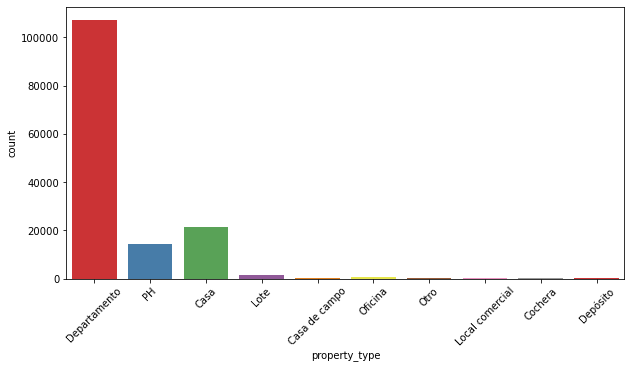

In [12]:
plt.figure(figsize=(10,5))
chart = sns.countplot(df['property_type'],palette = 'Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

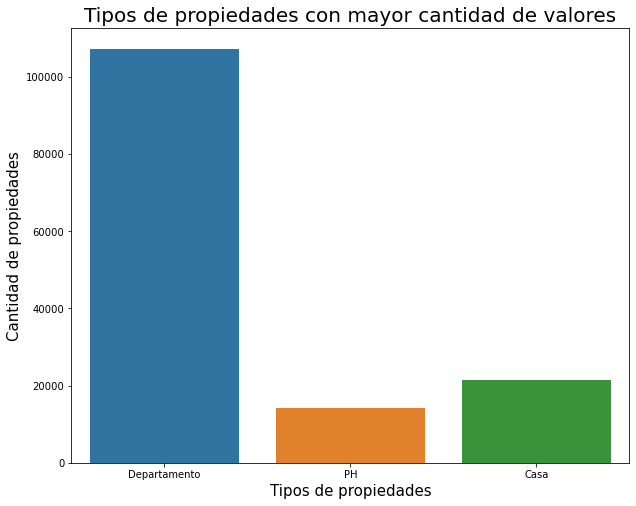

In [13]:
#Primero hago una listo con los 3 con mayor valores 
data1 =['Departamento', 'PH', 'Casa']

#Vamos a propiedades , donde se encuentren estos 3 tipos 
data1 = df[df['property_type'].isin(data1)]

plt.figure(figsize=(10,8))
sns.countplot(x = 'property_type', data = data1)
plt.xlabel("Tipos de propiedades" , fontsize = 15)
plt.ylabel("Cantidad de propiedades" , fontsize = 15)
plt.title("Tipos de propiedades con mayor cantidad de valores" , fontsize = 20)
plt.show()

**Region/Locacion de las propiedades**

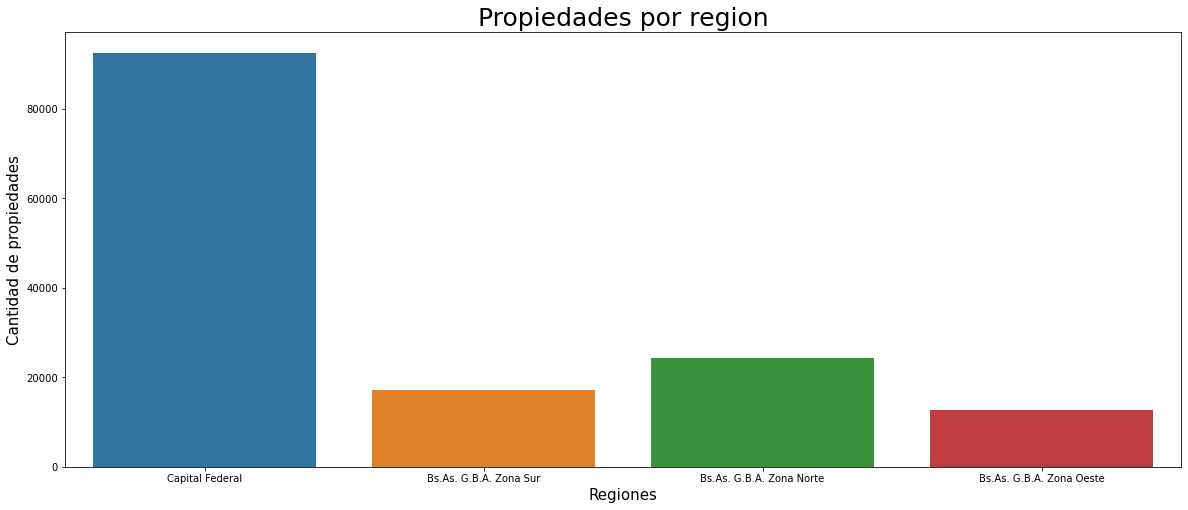

In [14]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'l2', data = df)
plt.xticks(rotation = 360)
plt.xlabel("Regiones" , fontsize = 15)
plt.ylabel("Cantidad de propiedades" , fontsize = 15)
plt.title("Propiedades por region" , fontsize = 25)
plt.show()

Las regiones donde mayormente son las publicaciones se encuentran principalmente en Capital Federal , seguido por zona norte y Zona Sur de GBA

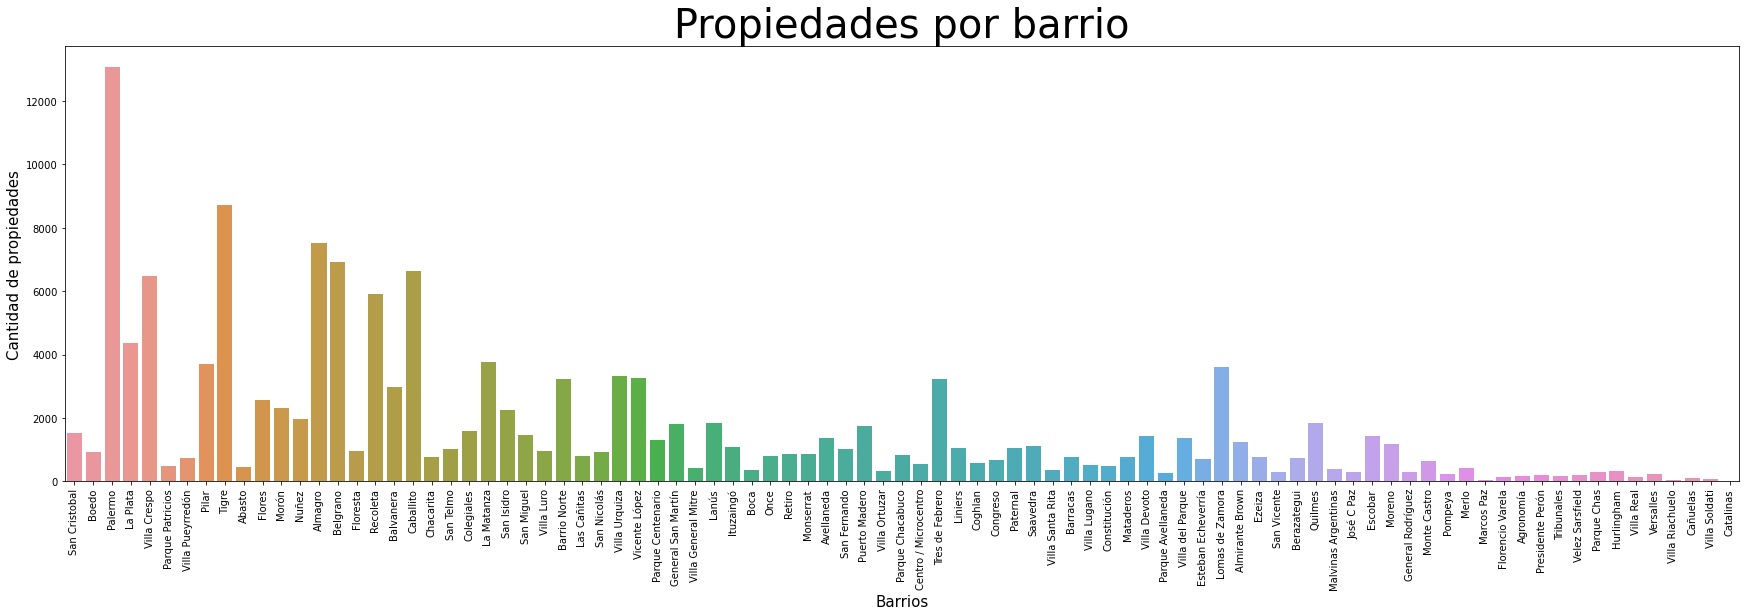

In [15]:
plt.figure(figsize=(30,8))
sns.countplot(x = 'l3', data = df)
plt.xticks(rotation = 90)
plt.xlabel("Barrios" , fontsize = 15)
plt.ylabel("Cantidad de propiedades" , fontsize = 15)
plt.title("Propiedades por barrio" , fontsize = 40)
plt.show()

El filtrado que se realizaria es solamente para Capital Federal , seleccionando los tipos de propiedades como Departamentos , PH y Casa como las mas relevantes a estudiar

In [16]:
dfnew = df[df.l2.isin(['Capital Federal'])]
dfnew = dfnew[dfnew.property_type.isin(['Departamento','PH','Casa'])]
dfnew.shape


(91485, 19)

In [17]:
# Limpiaremos los datos con los valores duplicados y los NaN

dfnew = dfnew.dropna()
dfnew = dfnew.drop_duplicates()
dfnew.shape

(75693, 19)

Veremos las distribuciones que representan los diferentes variables , que son numericas donde varios graficos nos ayudarian mejor a entender como se comportan

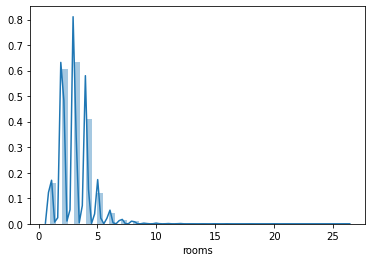

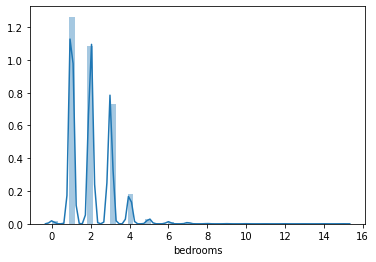

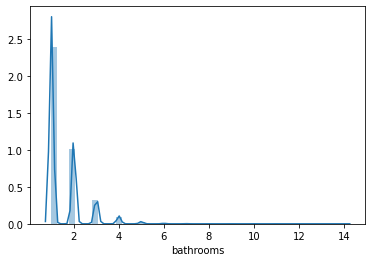

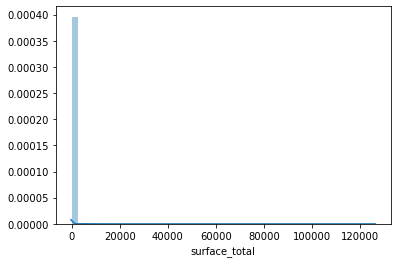

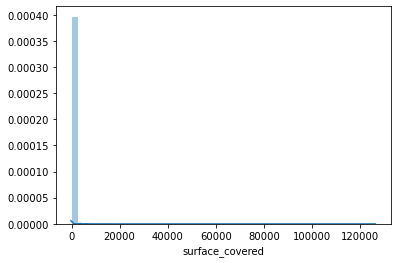

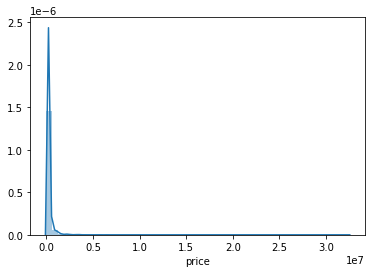

In [18]:
lista = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
for item in lista:
    sns.distplot(dfnew[item])
    plt.show()

Con los resultados observados podemos ver las distribuciones que poseen, y los outliers de los mismos que los eliminaríamos para que no nos influyen en el dataset. Es importante ver las distribuciones que poseen cada una de las variables para poder tomar una certera decisión de que método se podría elegir para eliminarlos.

Las variables 'surface_total' , 'surface_covered' , 'price' son las en que podemos apreciar un conglomerados de datos mas unido que las demas variables.

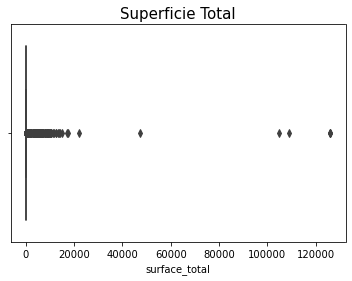

In [19]:
sns.boxplot(dfnew['surface_total'])
plt.title("Superficie Total" , fontsize = 15)
plt.show()

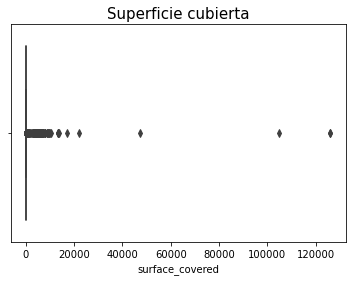

In [20]:
sns.boxplot(dfnew['surface_covered'])
plt.title("Superficie cubierta" , fontsize = 15)
plt.show()

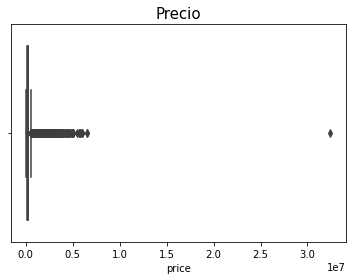

In [21]:
sns.boxplot(dfnew['price'])
plt.title("Precio" , fontsize = 15)
plt.show()

Realizando BoxPlots podemos ver en mas detalle que el 75% de estas variables esta cubierto 

Para poder determinar donde haremos los cortes de los outliers en todo el dataset, serán a través de los rangos intercuartílico.

In [22]:
Q1 = dfnew.quantile(0.25)
Q3 = dfnew.quantile(0.75)
IQR = Q3 - Q1
Q1.filter = (dfnew < (Q1 - 1.5 * IQR))
Q3.filter = (dfnew > (Q3 + 1.5 * IQR))
dsfilter = dfnew[~((dfnew < (Q1 - 1.5 * IQR))|(dfnew > (Q3 + 1.5 * IQR))).any(axis=1)] 
dsfilter.shape

(65102, 19)

Se van a filtrar aquellos elementos que tengan como parámetro una superficie cubierta > superficie total, esto no puede ser posible así que lo que vamos a realizar será filtrar aquellas filas en que cumplan con esta condición.

In [23]:
filtrado_sup = dsfilter['surface_covered'] <= dsfilter['surface_total']
filtrado_sup.value_counts()

True     64563
False      539
dtype: int64

Como podemos observar hay 539 instancias en la cual cumplen con esta condición, que será filtrada por no ser posible en términos prácticos.

In [24]:
ds = dsfilter[filtrado_sup]
ds.shape

(64563, 19)

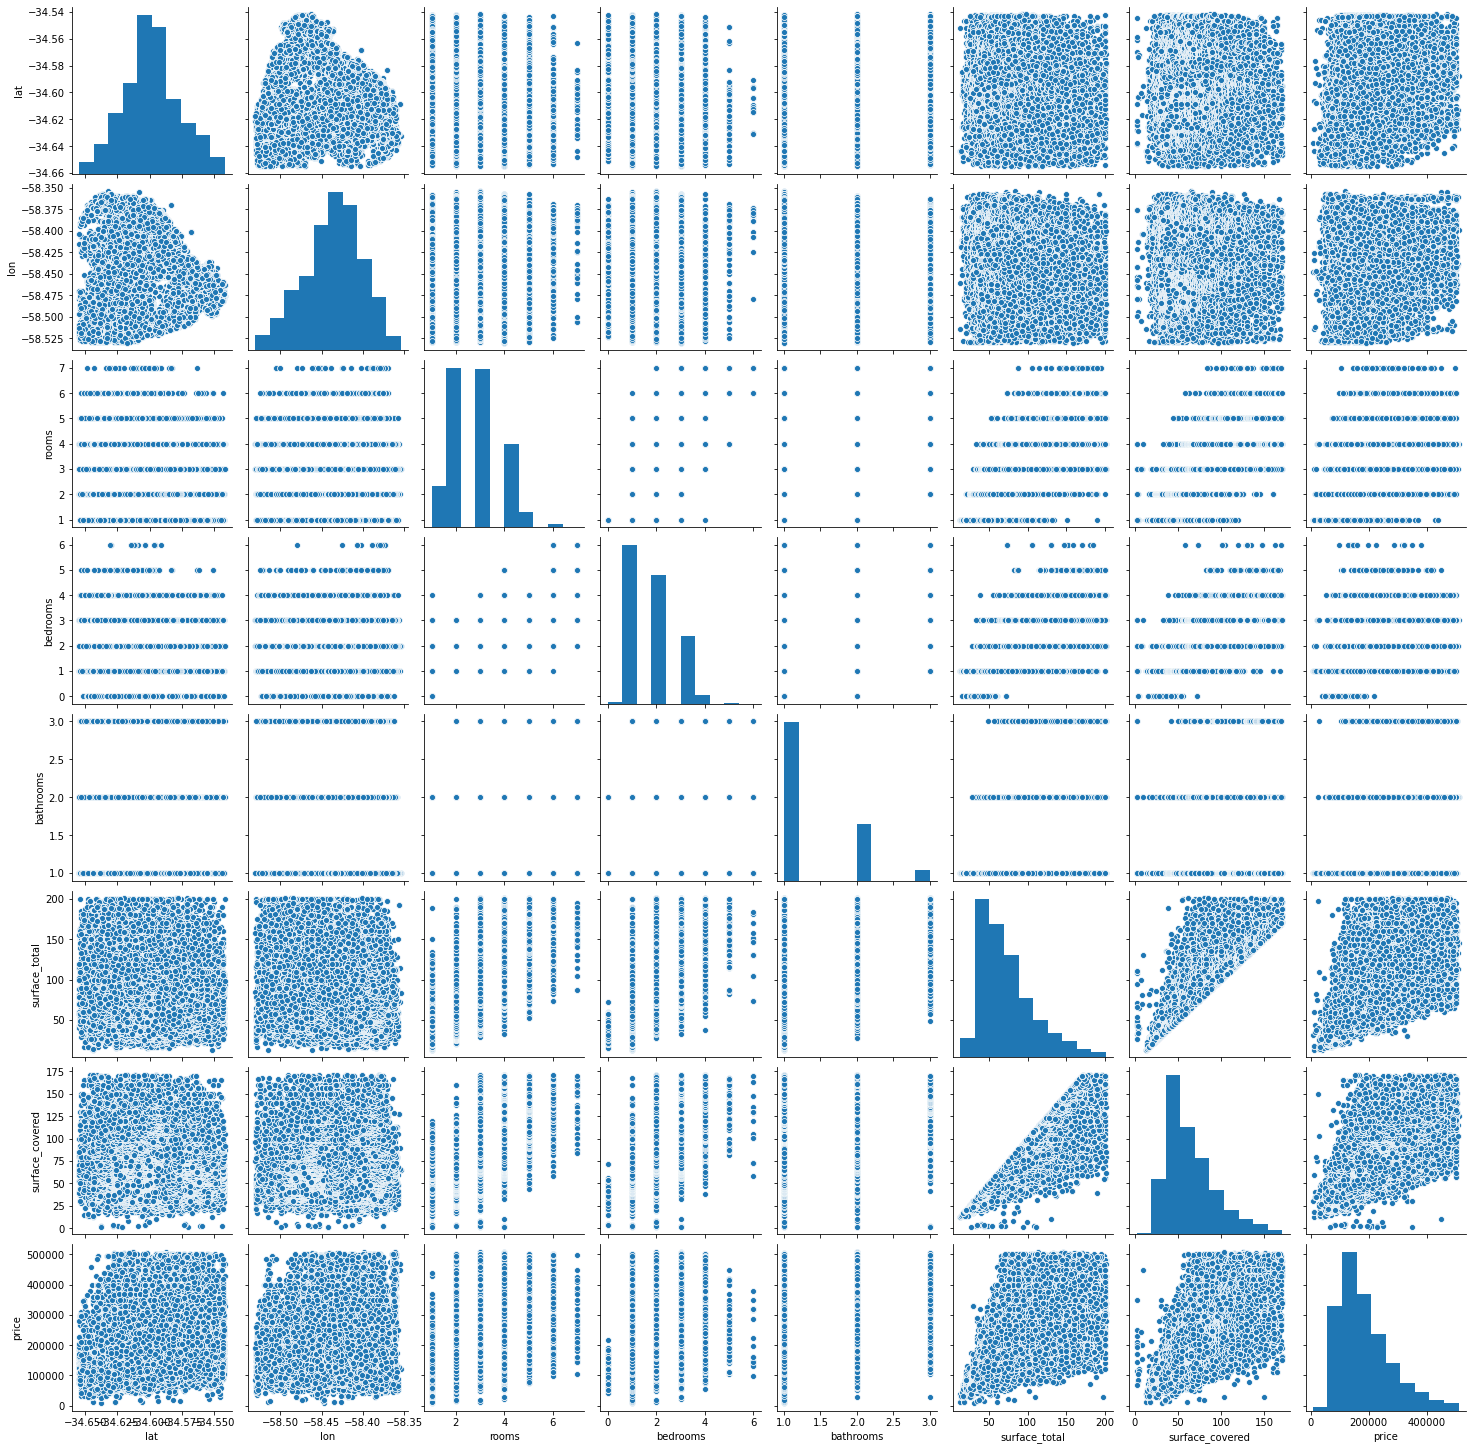

In [25]:
sns.pairplot(ds)
plt.show()

**Correlaciones de los datos** 

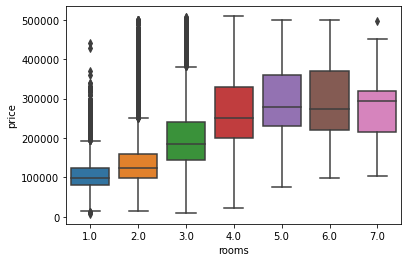

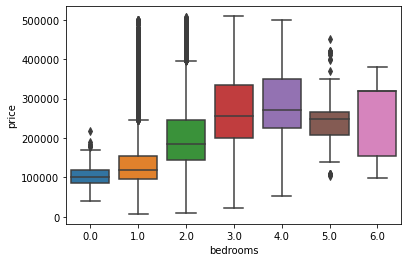

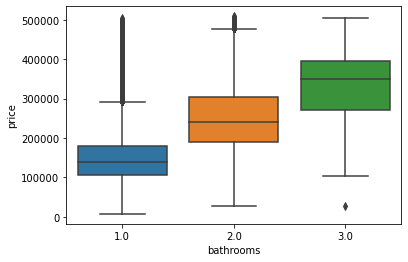

In [26]:
lista = ['rooms', 'bedrooms', 'bathrooms']
for item in lista:
    sns.boxplot(x = item, y= 'price', data=ds)
    plt.show()

Como podemos observar con respecto a la primer variable 'rooms' en relación con el precio , a medida que mayor cantidad de cuartos tenemos incrementa el precio exponencialmente , aunque luego de 5 habitaciones hasta 7 los cambios no son significativos y se mantienen, algo similar ocurre con el número de habitaciones que se comporta igual hasta llegar a 4 habitaciones. Debemos tener en cuenta que los cuartos pueden ser usados como habitaciones posteriormente, aunque las habitaciones pueden estar acondicionadas (ventilación, closet, etc...) para que su principal función sirva de dormitorio. Esto nos puede dar un indicio en el la cantidad de habitaciones disponibles en la casa puede ser un factor para poder determinar el precio, debido al comportamiento que tiene con el precio. Las cantidades de baños podemos ver que también guarda una relación lineal con respecto al precio.

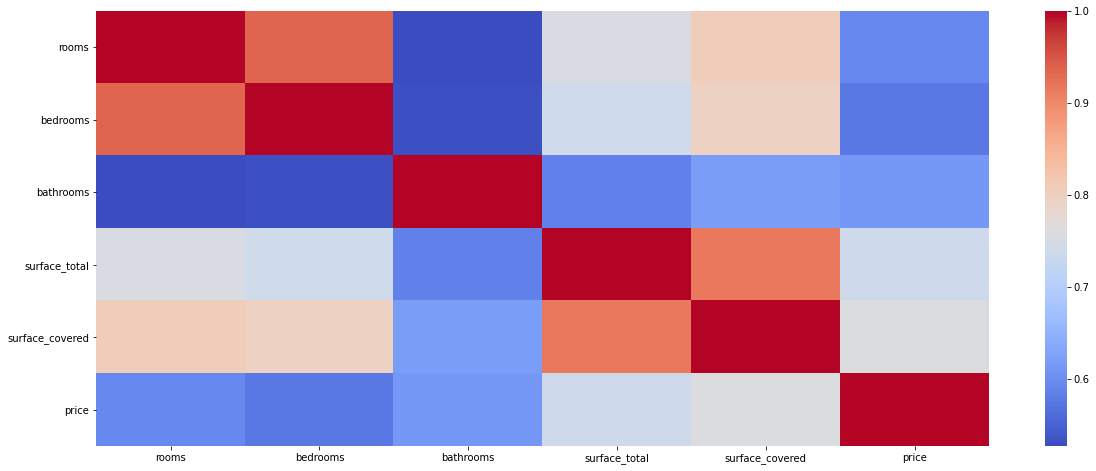

In [27]:
filtromapa = ds[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
# Tamaño del grafico
plt.figure(figsize=(20,8))
# Calculamos la matriz de correlacion 
corr_matrix=filtromapa.corr() 
#Plot
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

Podemos observar en un "heatmap" que las variables mas relacionadas en relacion con el precio son las de 'rooms' , 'bedrooms' y 'bathrooms'

### ¿Casa antiguas pero caras?

Como podemos observar a mayor cantidad de 'cuartos' el precio va aumentando , como tambien la zona donde se encuentran las propiedades es un factor que influye a la hora de determinar en una parte su precio. 
En (http://www.cheargentina.com/barrios-de-buenos-aires/) podemos observar la antiguedad de algunos barrios, donde por ejemplo: San Telmo, es uno de los barrios mas antiguos de Buenos Aires, y la construccion de las viviendas en su mayoria data de un numero prolongado de años, a comparacion de barrios mas nuevos como lo pueden ser 
Palermo. Esto lo podemos ver en el siguiente chart, donde hay una diferencia aproximada de u$s 50.000 promedio entre las viviendas

Aunque posiblemente en Palermo , que al ser un barrio mucho mas nuevo , por ende con propiedades mas nuevas en promedio, la diferencia que tiene con respecto a propiedades que se ubican en San Telmo se ubican en 1/4 mas baratas en promedio, aunque esta afirmacion puede estar sesgada ya que la antiguedad de las vivendas no es un dato que tenemos en el dataset, y posiblemente el valor agregado es el terreno mas que la propiedad en 'si' en el caso de San Telmo.

Variables que podrian influir significativamente al decidir el fin de una compra de propiedad (inversion,vivienda,etc..)

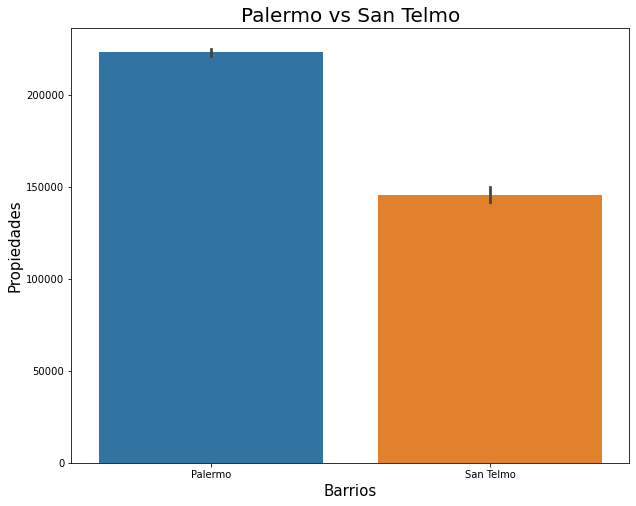

In [28]:
barrios = ['Palermo', 'San Telmo']
mask_barrio = ds[(ds['l3'].isin(barrios))]
#mask_barrio
plt.figure(figsize=(10,8))
sns.barplot(x = 'l3', y = 'price', data = mask_barrio)
plt.xlabel("Barrios" , fontsize = 15)
plt.ylabel("Propiedades" , fontsize = 15)
plt.title("Palermo vs San Telmo" , fontsize = 20)
plt.show()

### Modelos de Machine Learning

Vamos a entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). 

**Metrica**

La metrica que vamos a utilizar para evaluar los resultados de los modelos, es **RMSE (Raiz del error cuadratico medio)** el cual nos mide el error, por lo que a valor mas bajo cercano a 0, mejor regresor.

Primero vamos a preparar el nuevo dataset

In [30]:
#Limpieza del dataset
columnas = ['rooms','bedrooms', 'bathrooms','surface_total' ,'surface_covered' ,'price']
ml = pd.read_csv(('Datos_RealEstate.csv'))
ml.shape

(146660, 19)

In [31]:
# Filtrado por precio y superficie
ml = ml[(ml['surface_total'] <= 1000) & (ml['surface_total'] >= 15)]

In [32]:
# Filtrado por precio
ml = ml[ml['price'] <= 4000000]

In [33]:
#Filtrado por Capital Federal , y tipos de propiedades
ml = ml[ml.property_type.isin(['Departamento', 'PH', 'Casa'])]
ml = ml[ml.l2.isin(['Capital Federal'])]  


In [34]:
#Filtrado de todos los NaN
ml = ml[['rooms','bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].dropna()
ml

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0
146555,3.0,2.0,2.0,144.0,134.0,480000.0
146556,4.0,2.0,2.0,317.0,143.0,530000.0
146557,3.0,2.0,2.0,145.0,145.0,420000.0


In [35]:
ml.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

In [36]:
dataset_ml = ml
dataset_ml

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0
146555,3.0,2.0,2.0,144.0,134.0,480000.0
146556,4.0,2.0,2.0,317.0,143.0,530000.0
146557,3.0,2.0,2.0,145.0,145.0,420000.0


Una vez con el dataset "curado" procedemos a realizar los modelos de Machine Learning. Empezaremos con un modelo benchmark en el cual tomaremos como referencia para poder medir los resultados obtenidos en Decision Tree y KNN.

El modelo benchmark a utilizar es una Regresion Lineal, ya que generalmente este suele ser el modelo de partida para problemas de regresion. Se utilizaran modelos de regresion ya que la variable a predecir es continua (precios).

In [37]:
#Importo las librerias necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
# Elegimos las variables X e y con las que entrenaremos los datos con una mezcla de 30% de los datos
X = dataset_ml.iloc[:,:5]
y = dataset_ml.iloc[:,5]
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.30, random_state = 42)
print("Train test size: ", X_train.shape)
print("Test train size: ", X_test.shape)

Train test size:  (56713, 5)
Test train size:  (24306, 5)


In [39]:
# Llama la funcion sin parametros
linear_model = LinearRegression()

In [40]:
# Entreno el modelo con fit
linear_model.fit(X_train, y_train)

LinearRegression()

Realizamos las prediciones para train y test, las mismas seran guardades en variables diferentes.

In [41]:
# Realizamos la prediccion
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

Calculamos el **RSME** para train y test, y procedemos a graficarlos.

Modelo: Regresion Lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361567


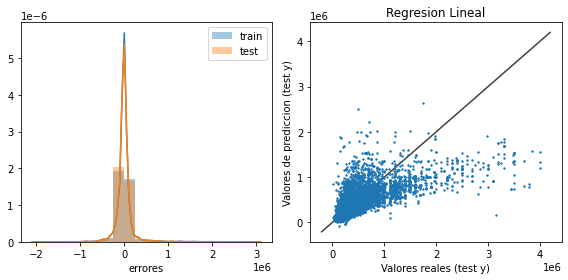

In [42]:
from sklearn.metrics import mean_squared_error

print(f'Modelo: Regresion Lineal')

rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_linear}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_linear}')

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_linear, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_linear, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_linear, s =2)
    
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.title('Regresion Lineal')
plt.xlabel('Valores reales (test y)')
plt.ylabel('Valores de prediccion (test y)') 
plt.tight_layout()
plt.show()

Como podemos observar los errores se comportan con una forma de campana gausseana, lo que nos da un indicio que estamos aproximando nuestros datos de una manera correcta, donde tambien podemos observar en nuestro scatter que no se ajusta a una regresion lineal.

In [43]:
Error_Lineal = abs(np.array(rmse_train_linear)-np.array(rmse_test_linear))
Error_Lineal

3275.53286833092

Nuestro modelo benchmark tiene **un error de 3275.5328**

Evaluacion del modelo en nuestros datos de test:

In [44]:
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_test_pred_linear)

In [45]:
predicciones_rlineal = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-) en u$s'), (((val_real-val_pred)/val_real)*100).rename('Porcentaje')],  axis=1)

Realizamos una tabla con los resultados de las predicciones segun nuestro valores de test.

- Porcentaje si este es negativo refiere sobre el porcentaje excedido del valor predicho sobre el real.

- La diferencia se refiera a cantidad expresada en u$s (dolares).

In [46]:
predicciones_rlineal.head(10)

,Valor real,Valor Pred,Dif(+/-) en u$s,Porcentaje
0,189000.0,1.169216e+05,7.207838e+04,38.136711
1,67500.0,1.311832e+05,6.368317e+04,-94.345432
2,260000.0,3.372246e+05,7.722464e+04,-29.701785
3,205000.0,1.406957e+05,6.430434e+04,31.367973
4,85000.0,1.557274e+05,7.072742e+04,-83.208732
5,79000.0,1.159045e+05,3.690453e+04,-46.714592
6,3850007.0,1.579042e+06,2.270965e+06,58.986003
7,310000.0,1.935619e+05,1.164381e+05,37.560691
8,119500.0,1.561668e+05,3.666679e+04,-30.683504
9,135000.0,2.055438e+05,7.054378e+04,-52.254652


# Arboles de decision

Lo primero que haremos sera entrenar el arbol y usar de metrica al **RMSE**, como hicimos previamente en la Regresion Lineal

In [47]:
# Cargamos Tree Regressor desde la libreria
from sklearn.tree import DecisionTreeRegressor

In [48]:
# Lo asignamos a una variable para poder trabajarlos mas comodamente
tree_model = DecisionTreeRegressor(max_depth=3, random_state = 42)

Previamente habiamos separado el conjunto de datos en test y train, por lo que solamente es entrenarlo.

In [49]:
# Entrenamos el modelo
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [50]:
# Realizamos la prediccion
y_test_pred_tree = tree_model.predict(X_test)
y_train_pred_tree = tree_model.predict(X_train)

Calculamos el **RSME**

Modelo: Arboles de decision
Raíz del error cuadrático medio en Train: 191783.485243933
Raíz del error cuadrático medio en Test: 194688.15091192327


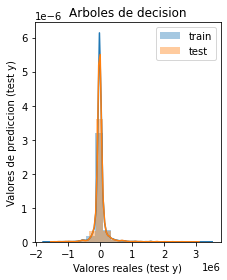

In [51]:
print(f'Modelo: Arboles de decision')

rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_tree}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_tree}')

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_tree, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_tree, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.title('Arboles de decision')
plt.xlabel('Valores reales (test y)')
plt.ylabel('Valores de prediccion (test y)') 
plt.tight_layout()
plt.show()

#rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
#print("RSME: ", rmse_test_tree)

Ahora tenemos que comenzar a tocar los valores haciendo mas profundo el arbol, donde veremos como comenzara a impactar en el RSME

In [52]:
tree_rmse_train = []
tree_rmse_test = []
profundidad = [3,4,5,6,7,8,9,10]

for value in profundidad:
    #Asignamos la profundidad
    deep_tree = DecisionTreeRegressor(max_depth=value)
    # Entrenamos el modelos
    deep_tree.fit(X_train, y_train)
    # Realizamos las predicciones sobre y_test e y predicho.
    deep_pred_test = deep_tree.predict(X_test)
    rmse_test_tree = np.sqrt(mean_squared_error(y_test, deep_pred_test))
    # Realizamos las predicciones sobre y_train e y_train.
    deep_pred_train = deep_tree.predict(X_train)
    rmse_train_tree = np.sqrt(mean_squared_error(y_train, deep_pred_train))
    #Guardamos los resultados en un arreglo
    tree_rmse_test.append(rmse_test_tree) 
    tree_rmse_train.append(rmse_train_tree)

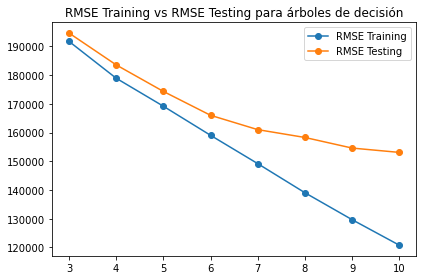

In [53]:
plt.plot([3,4,5,6,7,8,9,10], tree_rmse_train,'o-', label='RMSE Training')
plt.plot([3,4,5,6,7,8,9,10], tree_rmse_test,'-o', label='RMSE Testing')
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.tight_layout()
plt.show()

A medida que vamos aumentando la profundidad del arbol comienza a realizar overfitting el modelo.

Determinamos la diferencia de error entre **train** y **test**, donde podremos observar que profunidad de arbol tendria un mejor desempeño.

In [54]:
deph = pd.Series(np.array(range(3,11,1)))
delta_error = pd.DataFrame({'Profundidad del Arbol':deph, 'Errores': abs(np.array(tree_rmse_train) - np.array(tree_rmse_test))})
delta_error

,Profundidad del Arbol,Errores
0,3,2904.665668
1,4,4645.036137
2,5,5152.561326
3,6,6966.580541
4,7,11838.966933
5,8,19244.907265
6,9,24934.560388
7,10,32313.734909


Basado en nuestro benchmark las primeras 3 profundidades del arbol corresponden con mejor performance 

# KNN

Haremos el mismo procedimiento para KNN, dandole un valor arbritario para luego iterar valores donde encontraremos el que mejor se adecue al modelo.

In [55]:
# Cargamos KNN Regressor desde la libreria
from sklearn.neighbors import KNeighborsRegressor

In [56]:
# Le asignamos unas variables para luego comenzar a iterarlo con otras.
knn_model = KNeighborsRegressor(n_neighbors=2)

In [57]:
# Entrenamos el modelo
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [58]:
# Realizamos la prediccion
y_test_pred_knn = knn_model.predict(X_test)
y_train_pred_knn = knn_model.predict(X_train)

In [59]:
y_test_pred_knn

array([ 160500.,  114000.,  260000., ...,  227500., 1095000.,  159750.])

Calculamos el **RSME**

Modelo: KNN
Raíz del error cuadrático medio en Train: 92435.07024633957
Raíz del error cuadrático medio en Test: 153607.76698581807


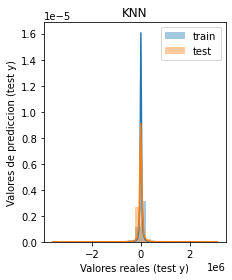

In [60]:
print(f'Modelo: KNN')

rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_knn}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_knn}')

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_knn, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_knn, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.title('KNN')
plt.xlabel('Valores reales (test y)')
plt.ylabel('Valores de prediccion (test y)') 
plt.tight_layout()
plt.show()

Ahora tenemos que comenzar a tocar los hiperparametros, donde veremos como comenzara a impactar en el RSME

In [61]:
knn_rmse_train = []
knn_rmse_test = []
vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]

for value in vecinos:
    #Asignamos los hiperparametros
    knn_hiper = KNeighborsRegressor(n_neighbors=value)
    # Entrenamos el modelos
    knn_hiper.fit(X_train, y_train)
    # Realizamos las predicciones sobre y_test e y predicho.
    knn_hiper_test = knn_hiper.predict(X_test)
    rmse_test_knn = np.sqrt(mean_squared_error(y_test, knn_hiper_test))
    # Realizamos las predicciones sobre y_train e y_train.
    knn_hiper_train = knn_hiper.predict(X_train)
    rmse_train_knn = np.sqrt(mean_squared_error(y_train, knn_hiper_train))
    #Guardamos los resultados en un arreglo
    knn_rmse_test.append(rmse_train_knn) 
    knn_rmse_train.append(rmse_test_knn)

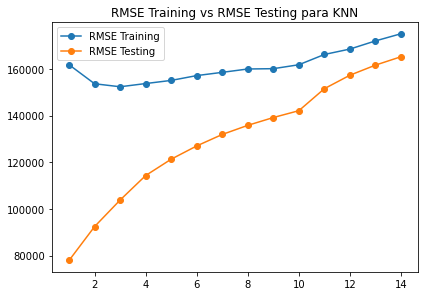

In [62]:
plt.plot(range(1,15, 1), knn_rmse_train,'o-', label='RMSE Training')
plt.plot(range(1,15, 1), knn_rmse_test,'-o', label='RMSE Testing')
plt.legend(loc="best")
plt.tight_layout()
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

Podemos obserbar que en los primero valores de vecinos cercanos realiza overfitting, esto lo podemos ver porque los resultados de RSME de test y train se encuentran muy alejados.

Observamos la diferencia de error entre los valores de test y train.

In [63]:
knnvecinos = pd.Series(np.array(range(1,15,1)))
delta_error_knn = pd.DataFrame({'Numero de vecinos':knnvecinos, 'Errores': abs(np.array(knn_rmse_train) - np.array(knn_rmse_test))})
delta_error_knn

,Numero de vecinos,Errores
0,1,83831.299818
1,2,61172.696739
2,3,48513.613763
3,4,39397.883804
4,5,33739.892796
5,6,30122.604332
6,7,26602.877408
7,8,24132.003458
8,9,20924.352219
9,10,19674.963671


Podemos ver claramente que los errores son superiores a comparacion de los otros modelos, donde quedaria descartado KNN para este problema puntual.

# Conclusiones

A medida que vamos utilizando mas arboles, podriamos caer mas en overfitting. Los valores de error son bastante mas grandes que los obtenidos con **Arboles de Decision** en el cual, su profunidad son inferiores donde no aplica el overfitting. de esta manera podemos concluir que la eleccion que se realiza para este problema en particular es **Arboles de desicion con una profundidad de 3.**, ya que no realizar overfitting y la diferencia de error entre train y test es la menor comparada con los demas modelos como son KNN y Regresion Lineal.

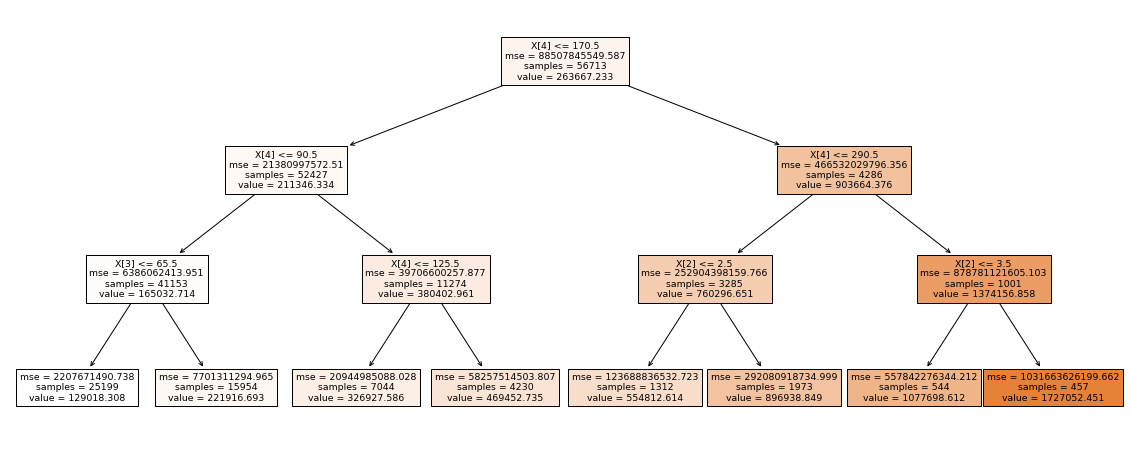

In [64]:
from sklearn import tree
if tree_model.max_depth < 4:
    plt.figure(figsize = (20,8))
    tree.plot_tree(tree_model, filled = True)
    plt.show()

Una de las cosas que se podrian mejorar es a traves de otras librerias podriamos ver las variables mas influyentes en este arbol con el nombre de cada feature, donde podriamos ver a cual le da mayor peso para comenzar las clasificaciones,determinando las variables que minimizarian el error.

La informacion que no se esta usando posiblemente puede ser la antiguedad de las propiedades, como asi tambien la cercania que puede llegar a tener a ciertas facilidades para los usuarios, como pueden ser gimnasio, centros comerciales, estaciones de subte/tren, etc...
Estas variables podrian considerarse pudiendo variar los resultados, un punto interesante seria poder agregar esta informacion al dataset, aunque podriamos trabajarlo y modificar el dataset con el apoyo de otras librerias que nos ayudarian a encontrar este tipo de informacion que requerimos.